In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [20]:
# 读取数据
df = pd.read_csv('raw_data/val_clinical_HER2.csv')
df

,ID,True_label,final_prediction,final_prediction_score,Age,Family history,Menopause,ER,PR,HER2,ki67,clinical_grade,clinical_grade_123,molecular_type
0,4769 CHEN JUAN JUAN.nii.gz,0,0,0.128703,38,0,0,Positive,Positive,Positive,Positive,0,0,3
1,4985 TIAN QIU NI.nii.gz,1,1,0.550298,66,0,1,Negative,Negative,Positive,Positive,0,0,4
2,4997 WANG BAO ZHU.nii.gz,0,0,0.176304,70,0,1,Negative,Positive,Positive,Positive,0,0,3
3,kejinzhen-MR020110.nii.gz,1,1,0.277961,66,0,1,Positive,Positive,Positive,Positive,0,0,3
4,009liyuexian.nii.gz,1,0,0.157724,57,1,1,Positive,Positive,Positive,Positive,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,HongHuiFang-MR019388.nii.gz,0,1,0.484170,46,0,0,Positive,Positive,Negative,Negative,3,2,0
173,PengLiChuan-MR029182-20230530.nii.gz,1,1,0.402891,69,0,1,Positive,Positive,Negative,Positive,3,2,1
174,WenGuiQin-MR029288-20230530.nii.gz,1,1,0.441151,70,0,1,Positive,Positive,Negative,Positive,2,2,1
175,xiesiyuan-MR039125.nii.gz,1,1,0.682088,46,0,0,Positive,Positive,Negative,Positive,2,2,1


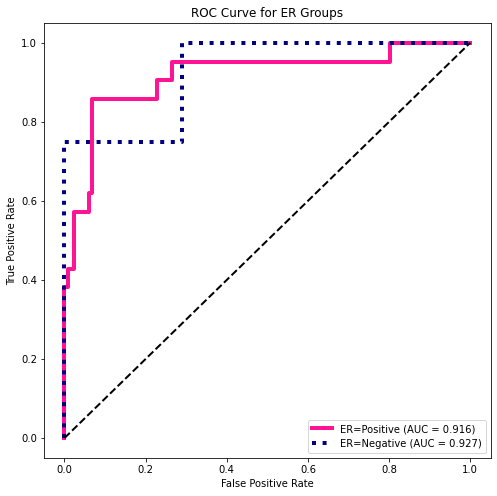

In [16]:
# 初始化绘图
plt.figure(figsize=(8, 8))

# 定义颜色和线型
colors = ["deeppink", "navy", "aqua", "darkorange", "cornflowerblue"]
ls = ['-', ':', '--', ':']

# 根据 ER 列分组（ER 取值为 0 或 1）
for i, er_value in enumerate(df['ER'].unique()):
    group_data = df[df['ER'] == er_value]
    
    # 假设 'score' 是模型的预测分数，'label' 是真实标签
    y_true = group_data['True_label']  # 真实标签
    y_score = group_data['final_prediction_score']  # 模型预测分数
    
    # 计算 ROC 曲线
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线，使用不同的颜色和线型
    plt.plot(fpr, tpr, label=f'ER={er_value} (AUC = {roc_auc:.3f})', 
             color=colors[i % len(colors)], linestyle=ls[i % len(ls)], linewidth=4)

# 绘制对角线（随机分类器的 ROC 曲线）
plt.plot([0, 1], [0, 1], "k--", lw=2)

# 设置图表标题和标签
plt.title('ROC Curve for ER Groups')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(f'img/roc_ER.tif', bbox_inches = 'tight')
# 显示图表
plt.show()

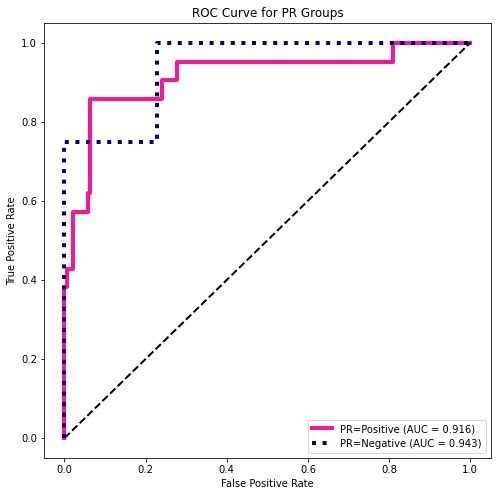

In [17]:
# 初始化绘图
plt.figure(figsize=(8, 8))

# 定义颜色和线型
colors = ["deeppink", "navy", "aqua", "darkorange", "cornflowerblue"]
ls = ['-', ':', '--', ':']


# 根据 ER 列分组（ER 取值为 0 或 1）
for i, pr_value in enumerate(df['PR'].unique()):
    group_data = df[df['PR'] == pr_value]
    
    # 假设 'score' 是模型的预测分数，'label' 是真实标签
    y_true = group_data['True_label']  # 真实标签
    y_score = group_data['final_prediction_score']  # 模型预测分数
    
    # 计算 ROC 曲线
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线，使用不同的颜色和线型
    plt.plot(fpr, tpr, label=f'PR={pr_value} (AUC = {roc_auc:.3f})', 
             color=colors[i % len(colors)], linestyle=ls[i % len(ls)], linewidth=4)

# 绘制对角线（随机分类器的 ROC 曲线）
plt.plot([0, 1], [0, 1], "k--", lw=2)

# 设置图表标题和标签
plt.title('ROC Curve for PR Groups')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(f'img/roc_PR.tif', bbox_inches = 'tight')
# 显示图表
plt.show()

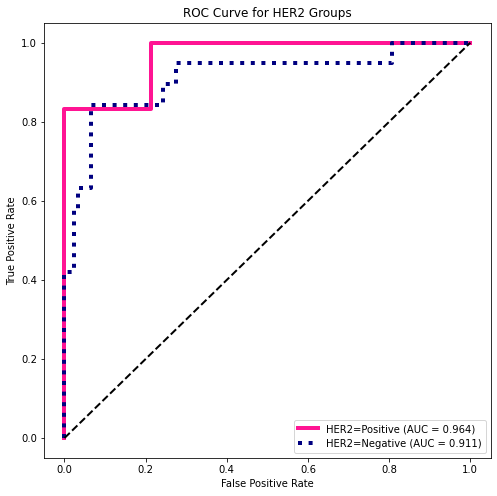

In [21]:
# 初始化绘图
plt.figure(figsize=(8, 8))

# 定义颜色和线型
colors = ["deeppink", "navy", "aqua", "darkorange", "cornflowerblue"]
ls = ['-', ':', '--', ':']


# 根据 ER 列分组（ER 取值为 0 或 1）
for i, pr_value in enumerate(df['HER2'].unique()):
    group_data = df[df['HER2'] == pr_value]
    
    # 假设 'score' 是模型的预测分数，'label' 是真实标签
    y_true = group_data['True_label']  # 真实标签
    y_score = group_data['final_prediction_score']  # 模型预测分数
    
    # 计算 ROC 曲线
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线，使用不同的颜色和线型
    plt.plot(fpr, tpr, label=f'HER2={pr_value} (AUC = {roc_auc:.3f})', 
             color=colors[i % len(colors)], linestyle=ls[i % len(ls)], linewidth=4)

# 绘制对角线（随机分类器的 ROC 曲线）
plt.plot([0, 1], [0, 1], "k--", lw=2)

# 设置图表标题和标签
plt.title('ROC Curve for HER2 Groups')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(f'img/roc_HER2.tif', bbox_inches = 'tight')
# 显示图表
plt.show()

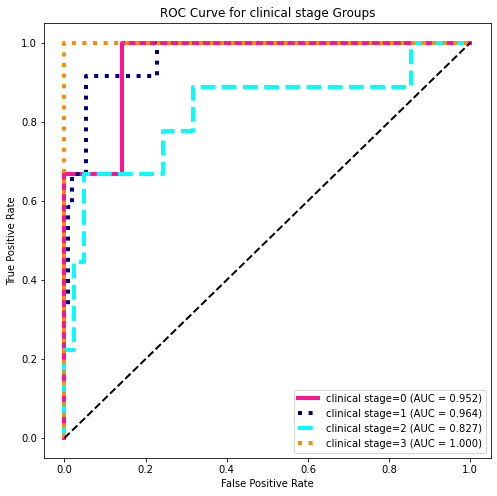

In [19]:
# 初始化绘图
plt.figure(figsize=(8, 8))

# 定义颜色和线型
colors = ["deeppink", "navy", "aqua", "darkorange", "cornflowerblue"]
ls = ['-', ':', '--', ':']


# 根据 ER 列分组（ER 取值为 0 或 1）
for i, pr_value in enumerate(df['clinical_grade_123'].unique()):
    group_data = df[df['clinical_grade_123'] == pr_value]
    
    # 假设 'score' 是模型的预测分数，'label' 是真实标签
    y_true = group_data['True_label']  # 真实标签
    y_score = group_data['final_prediction_score']  # 模型预测分数
    
    # 计算 ROC 曲线
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线，使用不同的颜色和线型
    plt.plot(fpr, tpr, label=f'clinical stage={pr_value} (AUC = {roc_auc:.3f})', 
             color=colors[i % len(colors)], linestyle=ls[i % len(ls)], linewidth=4)

# 绘制对角线（随机分类器的 ROC 曲线）
plt.plot([0, 1], [0, 1], "k--", lw=2)

# 设置图表标题和标签
plt.title('ROC Curve for clinical stage Groups')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig(f'img/roc_clinical_stage.tif', bbox_inches = 'tight')
# 显示图表
plt.show()